<h1><strong>Análise de sentimentos em avaliações de e-commerce de roupas</strong></h1>


**Objetivo**:

Classificar as avaliações de e-commerce de roupas em positiva ou negativa.

*   Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

***Orientador:*** Thiago de Melo

***Orientando:*** Edson Brilhante

# Importando as bibliotecas

In [ ]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
!pip install -U "mxnet-cu100<2.0.0"
!pip install autogluon
!pip install -U ipykernel

Found existing installation: mkl 2019.0
Uninstalling mkl-2019.0:
  Successfully uninstalled mkl-2019.0
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.7/352.7 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.7/273.7 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.0/83

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import autogluon as ag
from autogluon.core.utils.loaders.load_pd import load
from autogluon.text import TextPredictor
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importando o *dataset*

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Edson Henrique/dataset/Womens Clothing E-Commerce Reviews.csv')

# Visualização do *dataset*

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# Modelagem

## Seleciona as colunas '*Review Text*' e '*Rating*'

In [ ]:
dataset = dataset[['Review Text', 'Rating']]
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
 1   Rating       22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


## Encoding

Seleciona o atributo *'Rating'* e o converte da seguinte forma:



*   1, 2 e 3: negativa
*   4 e 5: positiva

In [ ]:
dataset['Rating'] = dataset['Rating'].apply(lambda x: 'pos' if x >= 4 else 'neg')
dataset['Rating'] = pd.Categorical(dataset['Rating'])

In [ ]:
dataset

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,pos
1,Love this dress! it's sooo pretty. i happene...,pos
2,I had such high hopes for this dress and reall...,neg
3,"I love, love, love this jumpsuit. it's fun, fl...",pos
4,This shirt is very flattering to all due to th...,pos
...,...,...
22636,I was very happy to snag this dress at such a ...,pos
22637,"It reminds me of maternity clothes. soft, stre...",neg
22638,"This fit well, but the top was very see throug...",neg
22639,I bought this dress for a wedding i have this ...,neg


## Dividindo o *dataset* em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Treino

Problem Type="binary"
Column Types:
   - "Review Text": text
   - "Rating": categorical

The GluonNLP V0 backend is used. We will use 2 cpus and 1 gpus to train each trial.


All Logs will be saved to /content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h/task0/training.log


Fitting and transforming the train data...
Done! Preprocessor saved to /content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h/task0/preprocessor.pkl
Process dev set...
Done!
Max length for chunking text: 192, Stochastic chunk: Train-False/Test-False, Test #repeat: 1.
 92%|█████████▏| 403M/436M [02:58<00:14, 2.26MiB/s]
#Total Params/Fixed Params=108990466/0
Using gradient accumulation. Global batch size = 128
Local training results will be saved to /content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h/task0/results_local.jsonl.
[Iter 7/1280, Epoch 0] train loss=6.80e-01, gnorm=5.04e+00, lr=5.47e-06, #samples processed=896, #sample per second=16.02. ETA=169.53min
[Iter 14/1280, Epoch 0] train loss=6.07e-01, gnorm=6.62e+00, lr=1.09e-05, #samples processed=896, #sample per second=15.79. ETA=169.82min
[Iter 21/1280, Epoch 0] train loss=4.88e-01, gnorm=3.47e+00, lr=1.64e-05, #samples processed=896, #sample per second=15.73. ETA=169.51min
[Iter 26/1280, Epoch 0] valid f1=9.3421e-

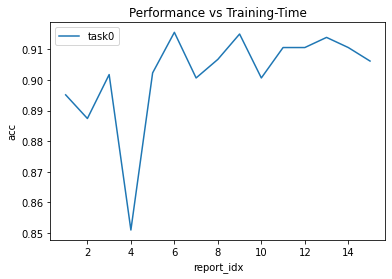

Training completed. Auto-saving to "/content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h/". For loading the model, you can use `predictor = TextPredictor.load("/content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h/")`


In [ ]:
predictor = TextPredictor(label='Rating', eval_metric='acc', path='/content/drive/MyDrive/Edson Henrique/code/autogluon_save_1h')
predictor.fit(train_data, time_limit=3600)

In [ ]:
#predictor = TextPredictor.load("/content/drive/MyDrive/Edson Henrique/code/autogluon_save/")

## Teste

In [ ]:
y_true = test_data['Rating'].values
y_pred = predictor.predict_proba(test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred = y_pred[:,1]
y_pred = np.where(y_pred == 1, 'pos', 'neg')

In [ ]:
print('Matriz de confusão')
print(confusion_matrix(y_true, y_pred))

print('\nMétricas')
print(classification_report(y_true, y_pred, digits=3))

print('\nScore')
print(accuracy_score(y_true, y_pred))

Matriz de confusão
[[ 925  192]
 [ 166 3246]]

Métricas
              precision    recall  f1-score   support

         neg      0.848     0.828     0.838      1117
         pos      0.944     0.951     0.948      3412

    accuracy                          0.921      4529
   macro avg      0.896     0.890     0.893      4529
weighted avg      0.920     0.921     0.921      4529


Score
0.9209538529476705


In [ ]:
test_score = predictor.evaluate(test_data)
print('Accuracy = {:.2f}%'.format(test_score * 100))

Accuracy = 92.10%


## Nova avaliação

In [ ]:
test_score = predictor.evaluate(test_data, metrics=['precision', 'recall', 'accuracy', 'f1'])
print(test_score)

{'precision': 0.944153577661431, 'recall': 0.9513481828839391, 'accuracy': 0.9209538529476705, 'f1': 0.9477372262773723}


In [ ]:
sentence1 = "I hated it"
sentence2 = "At first I loved it, but after trying it on it was a little too short and I don't think it's for me."
sentence3 = "It fits perfectly, I loved it."
predictions = predictor.predict({'Review Text': [sentence1, sentence2, sentence3]})

In [ ]:
predictions

0    neg
1    neg
2    pos
Name: Rating, dtype: object